<a href="https://colab.research.google.com/github/miguelangelrestrepo/PROYECTO_PUBG/blob/main/PROYECTO_PUBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***#1***
**Lo primero que haremos en la siguiente celda de código será importar todas las librerías que vamos a utilizar, si en el transcurso del desarrollo de los códigos vemos que debemos utilizar otras librerías, las importaremos en esta celda.**




In [ ]:
# Librerías
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
import os
import json


**Los dataset (3) de nuestra competencia de Kaggle son:               
(sample_submission-V2.csv, test_V2.csv y train_V2.csv).** 

In [ ]:
# Instalar Kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/'

**En el siguiente código almacenamos el contenido del archivo JSON para evitar cargarlo y así cargar el dataset directamente al Colab.**

In [ ]:
# Cargar credenciales de Kaggle
data = {"username": "miguelrestrepo2020", "key": "56fb6a22b015e063a8924fb78cdcc74a"}

with open('kaggle.json','w') as file:
  json.dump(data, file, indent=4)

**Con este código lo que hacemos es descargar directamente el dataset desde Kaggle, porque ya tenemos las credenciales.**



In [ ]:
!kaggle competitions download -c pubg-finish-placement-prediction

pubg-finish-placement-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Escribir 'A' y dar ENTER.
!unzip \*.zip && rm *.zip

Archive:  pubg-finish-placement-prediction.zip
replace sample_submission_V2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_submission_V2.csv  
  inflating: test_V2.csv             
  inflating: train_V2.csv            


**A partir de este punto empezamos a definir e imprimir cada uno de los archivos del dataset.**

In [ ]:
df_sam_sub=pd.read_csv("sample_submission_V2.csv")
df_sam_sub

,Id,winPlacePerc
0,9329eb41e215eb,1
1,639bd0dcd7bda8,1
2,63d5c8ef8dfe91,1
3,cf5b81422591d1,1
4,ee6a295187ba21,1
...,...,...
1934169,a316c3a13887d5,1
1934170,5312146b27d875,1
1934171,fc8818b5b32ad3,1
1934172,a0f91e35f8458f,1


In [ ]:
df_test=pd.read_csv("test_V2.csv")
df_test

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.000,0,0,588.00,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.000,0,0,2017.00,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.000,0,0,787.80,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.000,0,0,1812.00,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.000,0,0,2963.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,a316c3a13887d5,80e82180c90951,f276da5fd73536,1,2,381.00,3,0,7,4,...,-1,1,0.0,0,0.000,0,0,1799.00,5,1526
1934170,5312146b27d875,147264a127c56e,fb77cbfe094a6b,0,0,0.00,0,0,0,64,...,-1,0,0.0,0,0.000,0,0,1195.00,3,1496
1934171,fc8818b5b32ad3,7bbb4779ebedd5,efb74d5f6e9779,0,0,91.96,0,0,3,24,...,1482,0,0.0,0,7.798,1,0,3327.00,3,0
1934172,a0f91e35f8458f,149a506a64c2b1,3a2cf335bc302f,1,2,138.60,0,0,12,25,...,1456,1,0.0,0,0.000,0,0,1893.00,4,0


In [ ]:
df_train=pd.read_csv("train_V2.csv")
df_train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [ ]:
df_train.head().T

,0,1,2,3,4
Id,7f96b2f878858a,eef90569b9d03c,1eaf90ac73de72,4616d365dd2853,315c96c26c9aac
groupId,4d4b580de459be,684d5656442f9e,6a4a42c3245a74,a930a9c79cd721,de04010b3458dd
matchId,a10357fd1a4a91,aeb375fc57110c,110163d8bb94ae,f1f1f4ef412d7e,6dc8ff871e21e6
assists,0,0,1,0,0
boosts,0,0,0,0,0
damageDealt,0.0,91.47,68.0,32.9,100.0
DBNOs,0,0,0,0,0
headshotKills,0,0,0,0,0
heals,0,0,0,0,0
killPlace,60,57,47,75,45


In [ ]:
# Tipo de coincidencia entre las bases
dummies_train = pd.get_dummies(df_train['matchType'])
dummies_test = pd.get_dummies(df_test['matchType'])

In [ ]:
# Fusionamos los datos
df_train = pd.concat([df_train, dummies_train], axis=1)
df_test = pd.concat([df_test, dummies_test], axis=1)

In [ ]:
# Drop IDS (3 de ellos)
df_train.drop(['Id', 'groupId', 'matchId', 'matchType'], axis=1, inplace=True)

In [ ]:
df_train.isna().sum()

assists             0
boosts              0
damageDealt         0
DBNOs               0
headshotKills       0
heals               0
killPlace           0
killPoints          0
kills               0
killStreaks         0
longestKill         0
matchDuration       0
maxPlace            0
numGroups           0
rankPoints          0
revives             0
rideDistance        0
roadKills           0
swimDistance        0
teamKills           0
vehicleDestroys     0
walkDistance        0
weaponsAcquired     0
winPoints           0
winPlacePerc        1
crashfpp            0
crashtpp            0
duo                 0
duo-fpp             0
flarefpp            0
flaretpp            0
normal-duo          0
normal-duo-fpp      0
normal-solo         0
normal-solo-fpp     0
normal-squad        0
normal-squad-fpp    0
solo                0
solo-fpp            0
squad               0
squad-fpp           0
dtype: int64

In [ ]:
# Eliminamos la fila que falta
df_train.dropna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


In [ ]:
# Confirmar que se elimino una fila
df_train.shape

(4446965, 41)

In [ ]:
# Obtenemos las variables, sin los resultados
feature_cols = df_train.columns[df_train.columns!='winPlacePerc']
X = df_train[feature_cols]
y = df_train.winPlacePerc

In [ ]:
# Comprobamos
print(X.shape)
print(y.shape)

(4446965, 40)
(4446965,)


In [ ]:
# Creamos una division de prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [ ]:
# Escala de característica
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

**A partir de este punto empezamos a hacer la regresión lineal**

In [ ]:
# Importamos la regresion lineal y la media del error absoluto (MAE)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Instanciar
linreg = LinearRegression()

# Ajustar
linreg.fit(X_train, y_train)

# Predecir
y_pred = linreg.predict(X_test)

# Evaluar
mean_absolute_error(y_pred, y_test)

0.08995096224360145

**En este punto usamos la regresion K-Nearest-Neighbor para entrenar cada punto**

In [ ]:
# Esto tardará un poco jajaja
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Instanciar
knn = KNeighborsRegressor(9)

# Ajustar
knn.fit(X_train, y_train)

# Predecir
y_pred = knn.predict(X_test)

# Evaluar
mean_absolute_error(y_pred, y_test)

0.08995096224360145

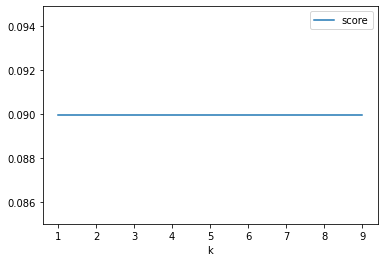

In [ ]:
scores = []
for k in range(1,10):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score = mean_absolute_error(y_pred, y_test)
    scores.append([k, score])
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score'); 

**Regresión de árboles de desición**

Usamos los árboles de desición para detectar iteraciones no lineales

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Instanciar
tree = DecisionTreeRegressor()

# Entrenar el modelo
tree.fit(X_train, y_train)

# Predecir
y_pred = tree.predict(X_test)

# Evaluación de la métrica
mean_absolute_error(y_pred, y_test)

0.08110469632342757

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# Entrenar el modelo
rf.fit(X_train, y_train)

# Predecir
y_pred = rf.predict(X_test)

# Evaluar Métrica
mean_absolute_error(y_pred, y_test)

0.08110469632342757

**Regresión de vectores de apoyo**

Aplicamos el escalado de características

In [ ]:
# Importar modelo 
from sklearn.svm import SVR

# Instanciar
svr = SVR(kernel = 'rbf', gamma='scale')

# Ajustar
svr.fit(X_train, y_train)

# Evaluación
from sklearn.metrics import mean_absolute_error

# Predecir
y_pred = svr.predict(X_test)

# Evaluar
mean_absolute_error(y_pred, y_test)

**Búsqueda en cuadrícula con el mejor algortimo**

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1, 5, 10, 15, 20], 'epsilon':[0.1]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)
clf.best_params_

**Aplicamos los  parámetros de Gridsearch**

In [ ]:
# Instanciar
svr = SVR(kernel = 'rbf', gamma='scale', C=40, epsilon=0.1)

# Ajustar
svr.fit(X_train, y_train)

# Evaluación
from sklearn.metrics import mean_absolute_error

# Predecir
y_pred = svr.predict(X_test)

# Evaluar
mean_absolute_error(y_pred, y_test)

**Enviar los resultados a la competición de Kaggle**

In [ ]:
def submission(df, features, algorithm):
    x_oos = df[features]
    algo = algorithm
    algo.fit(X_train, y_train)
    pred = algo.predict(x_oos)
    
    test_id = df["Id"]
    sub = pd.DataFrame({'Id': test_id, "winPlacePerc": pred} , columns=['Id', 'winPlacePerc'])
    return sub.head()
submission(df_test, feature_cols, RandomForestRegressor())

In [ ]:
# Predecir las probabilidades reales
# Documento de presentación
import random

X_oos = df_test[feature_cols]

svr = SVR(kernel = 'rbf', gamma='scale', C=40, epsilon=0.1)
svr.fit(X_train,y_train)
pred = svr.predict(X_oos)


test_id = df_test["Id"]
sub = pd.DataFrame({'Id': test_id, "winPlacePerc": pred} , columns=['Id', 'winPlacePerc'])
sub.to_csv("submission.csv", index = False)

**FIN...**